In [3]:
# Prepare the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
albumSales1 = pd.read_csv('C:/Users/P2190101/Desktop/NK Personal/NK Study/UNCC/6162 - KDD/Week 3 - Jan 31/Album Sales 1.txt', sep = '\t')

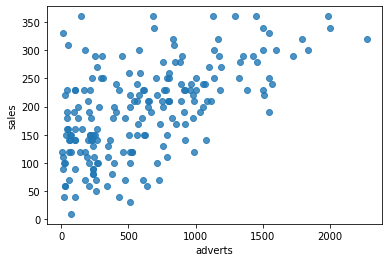

In [4]:
# Visualize and explore the data
plt.xlabel('adverts')
plt.ylabel('sales')
scat1 = sns.regplot(x="adverts", y="sales", fit_reg=False, data=albumSales1)


In [13]:
# Run a regression analysis

import statsmodels.formula.api as smf

lm = smf.ols('sales ~ adverts', data=albumSales1).fit()
lm.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     99.59
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           2.94e-19
Time:                        18:49:17   Log-Likelihood:                -1120.7
No. Observations:                 200   AIC:                             2245.
Df Residuals:                     198   BIC:                             2252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.1399      7.537     17.799      0.000     119.278     149.002
adverts        0.0961      0.010      9.979      0.000       0.077       0.115
==============================================================================
Omnibus:                        4.961   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.556
Skew:                           0.339   Prob(JB):                        0.102
Kurtosis:                       3.294   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Multiple Regression
# Prepare the data

albumSales2 = pd.read_csv('C:/Users/P2190101/Desktop/NK Personal/NK Study/UNCC/6162 - KDD/Week 3 - Jan 31/Album Sales 2.txt', sep = '\t')

C:\Users\P2190101\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


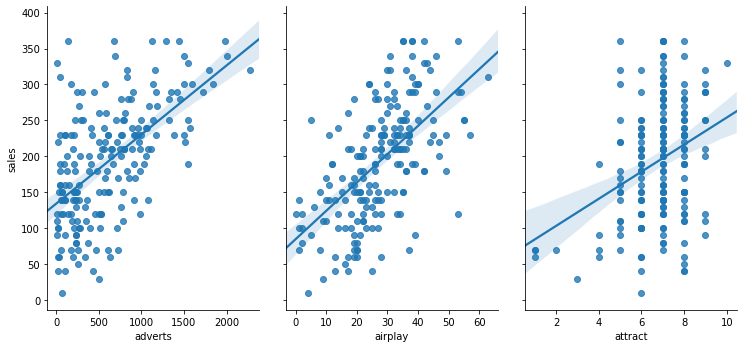

In [15]:
#Visualize and explore the data

sns.pairplot(albumSales2, x_vars=['adverts','airplay','attract'], y_vars='sales', size=5, aspect=0.7, kind='reg')


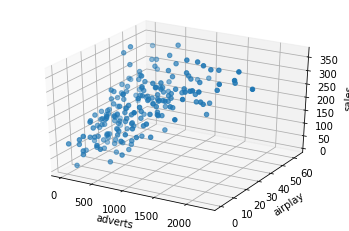

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(albumSales2['adverts'], albumSales2['airplay'], albumSales2['sales'])
ax.set_xlabel('adverts')
ax.set_ylabel('airplay')
ax.set_zlabel('sales')
plt.show()


In [17]:
# Build regression models

lm1 = smf.ols('sales ~ adverts ', data=albumSales2).fit()
lm2 = smf.ols('sales ~ adverts + airplay ', data=albumSales2).fit()
lm3 = smf.ols('sales ~ adverts + airplay + attract ', data=albumSales2).fit()


In [21]:
#Compare three models

import statsmodels.api as sm
table = sm.stats.anova_lm(lm1,lm2,lm3)

table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,198.0,862264.167468,0.0,NaN,NaN,NaN
1,197.0,480427.878124,1.0,381836.289343,172.214197,1.109942e-28
2,196.0,434574.581730,1.0,45853.296394,20.680561,9.492121e-06


In [22]:
#Final model

lm3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     129.5
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           2.88e-46
Time:                        18:53:12   Log-Likelihood:                -1052.2
No. Observations:                 200   AIC:                             2112.
Df Residuals:                     196   BIC:                             2126.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.6130     17.350     -1.534      0.127     -60.830       7.604
adverts        0.0849      0.007     12.261      0.000       0.071       0.099
airplay        3.3674      0.278     12.123      0.000       2.820       3.915
attract       11.0863      2.438      4.548      0.000       6.279      15.894
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.351
Skew:                          -0.073   Prob(JB):                        0.839
Kurtosis:                       3.144   Cond. No.                     4.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""